<h1><center>Calculus in Medical Data. Electrocardiography (EKG)</center></h1>

## Introduction

This article analyses the ECG and its interesting wave points, which are from importance to determine patient heart activity. The analysis of those interesting points could help to find early dangerouse conditions such as cardiac arrhythmias, electrolyte changes, and ischemia. This work tries to analyse the data and make suggestions, based mathematical and statistical methods. It tries to determine the person's stress levels based on the analysis of the frequency domain.

<b>Please note, that I am not a physician and the work should not be considered as a replacement of consulation with physician or medical advise.</b>

### ECG. Definition


ECG is graphical representation of the electrical activity of the hearth. We put positive electrode on the one side of cardiac tissue and negative electrode on cardiac tissue’s end.If the electrical activity of cardiac tissue is moving through the negative to positive electrode, then the positive electrode is generating a positive deflection.

Following points are from importance in ECG:
   1. The P wave is a small deflection wave that represents atrial depolarization. AV node is polarized, so it is activated, but generates the potential really slowly for 0.1 s. This is the PR interval
   2. Small Q waves correspond to depolarization of the interventricular septum. 
   3. The R wave reflects depolarization of the main mass of the ventricles –hence it is the largest wave
   4. The S wave signifies the final depolarization of the ventricles, at the base of the heart 
   5. T waves represent ventricular repolarization
   
   
    
 <div class="container" style="width:50%; height:50%">
  <img src="Conduction.png" style="width:60%; height:60%">
  <div class="text-block">
    <h4>Image 1. Electrical activity of the hearth</h4>
  </div>
</div> 

## Mathematics - In a search for R peaks

The data, that we have was recorded by 100 [Hz], the time is in centiseconds [cs] and the electrical power or voltage is in [µV]
R peaks are difficult to find. In order to determine the R peaks for signal, which does not have any noise, we will use following algorithm:

1. Determine the moving average. The Duration of QRS waves is about 75-100 ms. The moving average will be calculated based on the window of 750 ms or 75 cs [0.75 s] consist of:

$$ {\displaystyle MA=threshold*{\frac {1}{n}}\sum _{i=1}^{n}y_{i}={\frac {a_{1}+a_{2}+\cdots +a_{n}}{n}}} $$

- n is the sample size
- a are the amplitudes in the sample
- threshold is the normal ratio between R/T waves. In healthy person the ratio between R and T is around 1.3. We will use a threshold equal to 1.2 to increase the MA in order to limit the maximums to R wave.

$$ {a_{1}+a_{2}+\cdots +a_{n}} $$

2. The moving average will cross the data to the right of the R peak. As next step we will save the all point of the window, which are greater than MA until the amplitude is equal to MA. The we will find the maximum amplitude during this window and continue with the next:

$$ \max {a_{n}} \mid a_{n} > MA \land n \in [1\cdots{n}] $$

This will help us determine the R peaks. Based on the r peaks location we can calculate the time domain based heart rate variability:

### Analysis of R peaks in time domain

- NN - The cycle length between two beats in ms or beats per ms
- SDNN - It is the standard deviation of all normal RR intervals in the entire ECG record. The standard deviation of NN (SDNN) reflects the parasympathetic component of the autonomic function. It reflects the decrease in SDNN, decreased vagal activity and increased sympathetic activity of the sinus node in ms
- SDSD - It is the standard deviation of differences between successive normal cycles.
- RMSSD - It is the square root value of the total squared differences of successive NN intervals with sinus conduction. It is considered as an important indicator of parasympathetic activity.
- PNN50 - % It is obtained by dividing NN50 number into the total number of NN.It shows the percentage of differences greater than 50 msec between successive normal RR intervals in a ECG record. It predominantly reflects the parasympathetic activity.
- BPM - 60000/NN - beats per minute



## Implementation 
The implementation will be devided in analysis of the time domain and analysis of the frequency domain. Python was selected for the implementation, because of the large number of libraries, that ease the process and the documentation. 

In [18]:
### Importing pandas, numpy, matplotlib, time, ecgdetector, scipy, unittest, IPython.display
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import time
from ecgdetectors import Detectors
from scipy.interpolate import interp1d 
from scipy import signal
from IPython.display import Markdown
import unittest

### Time domain analysis with python
Moving average will be used to find the R peaks. The result will be increase by 1.2, but a dynamic threshold could also be used.

In [20]:
class ECG_Time_Domain_Analyse:
    """
    Analysis of ECG

    Parameters
    ----------
        data : list
            signal in time domain
    frequence
        frequence, used to obtain the data

    Attributes
    ----------
        data : list
            List, where we store the signal
        frequence : int
            Frequence, used to obtain the signal
    """
    
    
    pqrst_interval = 0.75 # 0.75s is normal time interval for PQRST, this would be our sample window
    heart_rate_variability = {}
    threshold = 1.2
    def __init__(self, data, frequence):
        self.data = data
        self.frequence = frequence

        
    
    def calculate_moving_average(self):    
        """
        Summary 
        ----------
            Calculates the moving average based on window interval

        Parameters
        ----------
            N/A

        Returns
        ---------
            moving_average : list
                signal moving average
        
        """
        moving_average = data.rolling(int(self.pqrst_interval*self.frequence)).mean()
        average_hr = (np.mean(data))
        moving_average = [average_hr if np.isnan(value) else value for value in moving_average]
        moving_average = [value* self.threshold for value in moving_average]
        return moving_average
    
    
    def detect_rr_peaks(self,moving_average):
        """
        Summary 
        ----------
            Detects R peaks in electrocardiography

        Parameters
        ----------
            moving_average : list
                signal moving average

        Returns
        ---------
            peak_list : list
                the location of R peaks on the heart signal
        
        """
        window = []
        peak_list = []
        position = 0
        for datapoint in self.data:
            average = moving_average[position]
            if (datapoint < average) and (len(window) < 1):
                position += 1
            elif (datapoint > average):
                window.append(datapoint)
                position += 1
            else:
                maximum = max(window)
                beatposition = position - len(window) + (window.index(max(window)))
                peak_list.append(beatposition)
                window = []
                position += 1
                
        return peak_list
    
    def general_plot(self,x,y,title,x_label,y_label,line_label):
        """
        Summary 
        ----------
            General R peak plotter

        Parameters
        ----------
            x : list
                Time values
            y : list
                Amplitude
            x_label : str
                Label for x axes
            y_label : str
                Label for y axes
            line_label : str
                Label for the plotted line
        Returns
        ---------
            N/A
        
        """
        plt.figure(figsize=(30,10))
        plt.gca().spines["left"].set_position("zero")
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.title(title,fontsize='15')
        plt.xlim(0,2483)
        plt.ylabel(y_label,fontsize='10')
        plt.xlabel(x_label,fontsize='10')
        
        plt.plot(x,y,label=line_label,c='skyblue',linewidth=5)
        plt.legend(loc=4,fontsize='10')
        plt.show()
        
        
    def plot_data(self):
        """
        Summary 
        ----------
            Plot the data, moving average is in orange

        Parameters
        ----------
            N/A
        Returns
        ---------
            N/A
        
        """
        plt.figure(figsize=(30,10))
        plt.gca().spines["left"].set_position("zero")
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.title("Heart Rate Signal",fontsize='20')
        
        plt.ylabel("Magnitute [µV]",fontsize='15')
        plt.xlabel("Time [cs]",fontsize='15')
        
        plt.plot(data,color='skyblue',linestyle='-',linewidth=2,label="Heart activity")
        plt.plot(self.calculate_moving_average(),color='orange',linewidth=5,label="Moving Average")
        
        
    def plot_rr_peaks(self,peak_list):
        """
        Summary 
        ----------
            Marks the r peaks on the figure with red dots

        Parameters
        ----------
            peak_list : list
                the location of R peaks on the heart signal
        Returns
        ---------
            N/A
        
        """
        for index in range(len(peak_list)):
            if index == len(peak_list)-1:
                plt.scatter(peak_list[index],self.data[peak_list[index]],c="r",s=100,linewidth=3,label="Average HR: {} BPM".format(np.round(self.calculate_heart_rate(),2)))
            else:
                plt.scatter(peak_list[index],self.data[peak_list[index]],c="r",s=100,linewidth=3)
                
        plt.legend(loc=4,fontsize='15')
        
    
    def analyse_ecg(self):
        """
        Summary 
        ----------
            Calls data and r peaks plotters

        Parameters
        ----------
            N/A
        Returns
        ---------
            N/A
        
        """
        start_time = time.time()
        rr_peaks = self.detect_rr_peaks(self.calculate_moving_average())
        execution_time = (time.time() - start_time)
        print("---Execition time of moving average algorithm: %s seconds ---" % execution_time)
        self.plot_data()
        self.plot_rr_peaks(rr_peaks)
        plt.show()
        return execution_time
    
    def calculate_rr_diffs(self):
        """
        Summary 
        ----------
            Calculates the difference between successive peaks

        Parameters
        ----------
            N/A
        Returns
        ---------
            list
                List of successive peak differences
        
        """
        return np.diff(self.detect_rr_peaks(self.calculate_moving_average()))
        
    def calculate_heart_rate(self):
        """
        Summary 
        ----------
            Heart rate estimation, based on the ECG

        Parameters
        ----------
            N/A
        Returns
        ---------
            float
                Heart rate
        """
        rr_peaks = self.calculate_rr_diffs()
        rr_seconds = np.divide(rr_peaks,100)
        rr_milliseconds = np.multiply(rr_seconds,1000)
        self.heart_rate_variability['rr_list'] = rr_milliseconds
        return  60000 / np.mean(self.heart_rate_variability['rr_list'])
    
    
    
    def get_rr_peaks(self):
        """
        Summary 
        ----------
            Returns the r peaks

        Parameters
        ----------
            N/A
        Returns
        ---------
            list
                r peaks
        """
        return self.detect_rr_peaks(self.calculate_moving_average())
    
    def calculate_heart_rate_variability(self):
        """
        Summary 
        ----------
            Summarize all the calculations and plots the result

        Parameters
        ----------
            N/A
        Returns
        ---------
            N/A
        """
        self.heart_rate_variability['rr_diff'] = self.calculate_rr_diffs()
        self.heart_rate_variability['rr_sqdiff'] = np.square(self.heart_rate_variability['rr_diff'])
        self.heart_rate_variability['bpm'] = self.calculate_heart_rate()
        self.heart_rate_variability['nn'] = np.mean(self.heart_rate_variability['rr_list'])
        self.heart_rate_variability['sdnn'] = np.std(self.heart_rate_variability['rr_list'])
        self.heart_rate_variability['sdsd'] = np.std(self.heart_rate_variability['rr_diff'])
        self.heart_rate_variability['rmssd'] = np.sqrt(np.mean(self.heart_rate_variability['rr_sqdiff']))
        NN20 = [x for x in self.heart_rate_variability['rr_diff'] if (x>20)]
        NN50 = [x for x in self.heart_rate_variability['rr_diff'] if (x>50)]
        self.heart_rate_variability['nn20'] = NN20
        self.heart_rate_variability['nn50'] = NN50
        self.heart_rate_variability['pnn20'] = float(len(NN20)) / float(len(self.heart_rate_variability['rr_diff']))
        self.heart_rate_variability['pnn50'] = float(len(NN50)) / float(len(self.heart_rate_variability['rr_diff']))
                            

---Execition time of pan tompkins algorithm: 0.007508993148803711 seconds ---
---Execition time of moving average algorithm: 0.00864100456237793 seconds ---


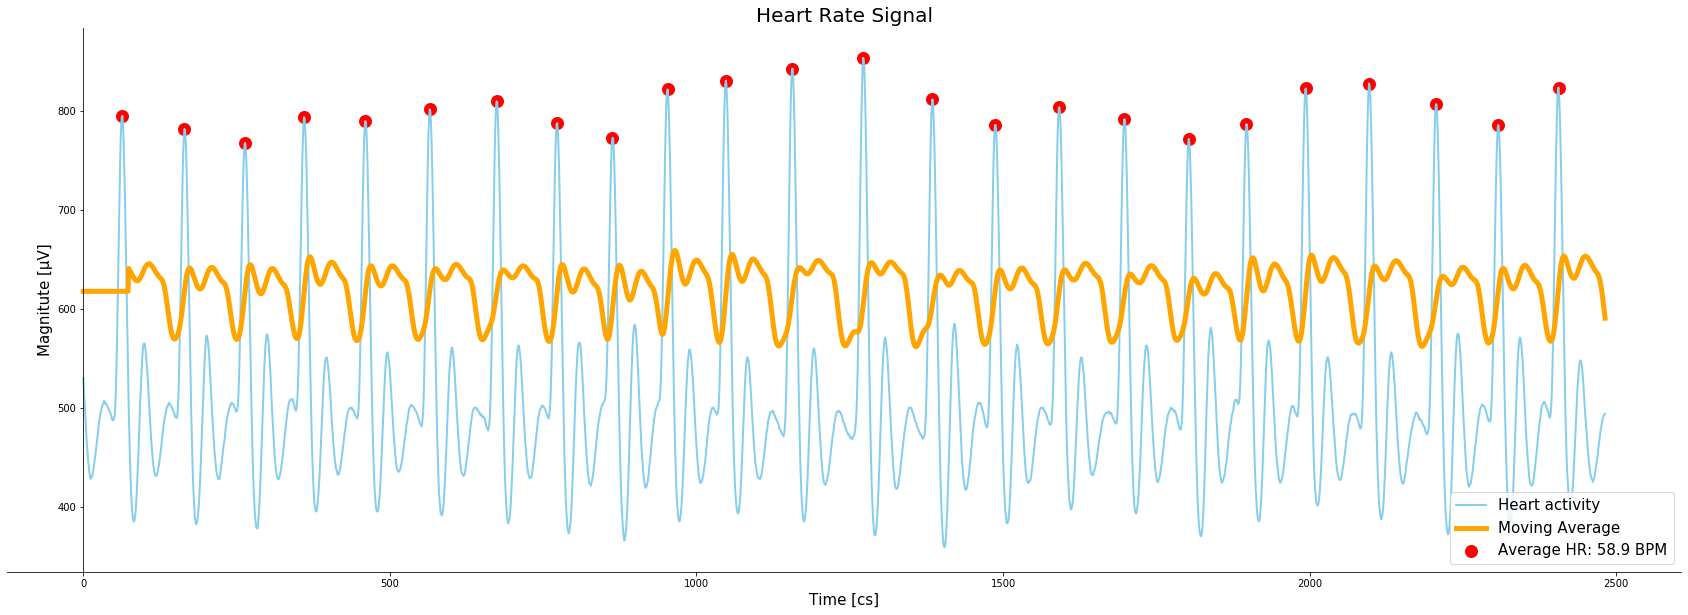

In [21]:
data = pd.read_csv("data.csv")['hart']

# The data was recorded by 100 Hz
ecg = ECG_Time_Domain_Analyse(data,100)

# Benchmarking with r peaks finder algorithms in python
detectors = Detectors(100)
start_time = time.time()
r_peaks = detectors.hamilton_detector(data)
execution_time = (time.time() - start_time)
print("---Execition time of pan tompkins algorithm: %s seconds ---" % execution_time)
execution_time_ma = ecg.analyse_ecg()


### Comparison between moving average and pan thompson algorithm by execution time on non-filtered signal

The test was executed by measuring the execution time for finding the r peaks.
#### Time testing

In [22]:
Markdown("""
#### Time comparison between the the moving average and pan thompason algorithm for R peak detection
| algorithm| execution time  |
|------|------|
|   pan-thompson  | {execution_time} |
|   moving-average | {execution_time_ma} |:""".format(execution_time=execution_time,execution_time_ma=execution_time_ma))






#### Time comparison between the the moving average and pan thompason algorithm for R peak detection
| algorithm| execution time  |
|------|------|
|   pan-thompson  | 0.007508993148803711 |
|   moving-average | 0.00864100456237793 |:

### Heart rate variability in time domain - Summary
As first step we have found the R peaks. The localization of the R peaks help us to determine:
bpm - beats of the heart per minute
nn - interval between two heartbeats (normal heartbeat)
sdnn - standard deviation of all nn invervals. Overall variability or total power
sdsd - standard deviation of the difference between successive NN intervals
rmssd - the square root of the sum of all differences between successive NN intervals
pNN20/50 - the percentage of successive intervals that differ by more than 20 or 50 ms 


In [23]:
ecg.calculate_heart_rate_variability()
hrv_list=ecg.heart_rate_variability
for key, value in  hrv_list.items():
    if key in ['bpm','pnn20','pnn50','rmssd','sdsd','nn','sdnn']:
        print("Key: "+str(key)+" Value: "+str(np.round(value,2)))

Key: bpm Value: 58.9
Key: nn Value: 1018.7
Key: sdnn Value: 65.76
Key: sdsd Value: 6.58
Key: rmssd Value: 102.08
Key: pnn20 Value: 1.0
Key: pnn50 Value: 1.0


## Mathematics - Heart rate variability in frequency domain

The Fourier transformation decomposes a function in time or signal into its frequency components. Some frequencies could be unwanted like noise and through decomposition we could easily remove them from the signal. The knowledge of the frequencies could help in the estimation of high and low frequency bands, which are in connection to breathing.

LF - The LF band (0.04–0.15 Hz) is comprised of rhythms with periods between 7 and 25 s and is affected by breathing from ~3 to 9 bpm

HF - The HF or respiratory band (0.15–0.40 Hz) is influenced by breathing from 9 to 24 bpm
The ratio of LF to HF power (LF/HF ratio) may estimate the ratio between sympathetic nervous system (SNS) and parasympathetic nervous system (PNS) activity under controlled conditions. The ratio could be refered to the stress levels, that individul is experiencing. To find the frequencies that create a discrete signal we use following transfromation:

$$ X_{k} = \sum_{k=0}^{N-1} x_{n}\underbrace{e^{\frac {-i2\pi}{N}{k}{n}}}_{W_{N}^{nk}}=\sum_{k=0}^{N-1} x_{n}[\cos (\frac{2\pi}{N}kn) - i\sin(\frac{2\pi}{N}kn) ] $$

- x - the value of the signal at equally spaced times [0..N-1] 
- N - number of samples
- n - current sample runs from 0 to N-1
- k - current frequency or number of cycles per time unit, k runs from [0..N-1 Hz] 

The signal will be interpolated in order to define equaly spaced time for discrete fourier transformation
Discrete fourier transformation completes in $$ Θ(𝑛^2) $$ time, because of $$ N^2 $$ complex multiplications.
$$ \\ $$
A more efficient computational method was developed, which devides the complex multiplications of odd and even sequences. An example

$$ X_{k} = \underbrace{\sum_{m=0}^{N/2-1} x({2m}){W_{N}^{2mk}}}_\text{even sequence}+\underbrace{\sum_{m=0}^{N/2-1} x(2m+1){W_{N}^{(2m+1)k}}}_\text{odd sequence} = \underbrace{{\sum_{m=0}^{N/2-1} x({2m}){W_{N/2}^{mk}}}}_\text{DFT of even sequence} + \underbrace{{W_{N}^{k}}{\sum_{m=0}^{N/2-1} x({2m+1}){W_{N/2}^{mk}}}}_\text{DFT of odd sequence} $$

We continue to use devide and conquer until we reach two point DFT, which will look like:
$$ X_{k} = \sum_{n=0}^{1} x({n})(e^{{-i\pi}})^{kn} $$
$$ X_{0} = x{0} + x{1} $$
$$ {e^{{-i\pi}}} = \cos({-\pi})+i\sin({-\pi}) $$ 
$$∴ X_{1} = x{0} - x{1} $$

In case of two point DFT, we prove, that there is no complex multiplication 
We can conclude, that the complexity of FFT is equal to:
$$ Θ(𝑛log𝑛) $$
Power spectral density shows how the energy of a signal or a time series is distributed with frequency and is equal to:
$$ S_{xx}= |{X_{k}^2}|$$
If X is measured in [V], then the power spectral density would be [V**2/Hz] or power per frequency
Finding the PSD of the signal will help us to determine the low and high frequencies of the Heart. The ratio between these values help us to determine the ratio between the sympathetic and parasympathetic systems. This ratio is associated with the stress levels


## Implementation - Analysis of the frequency domain using python

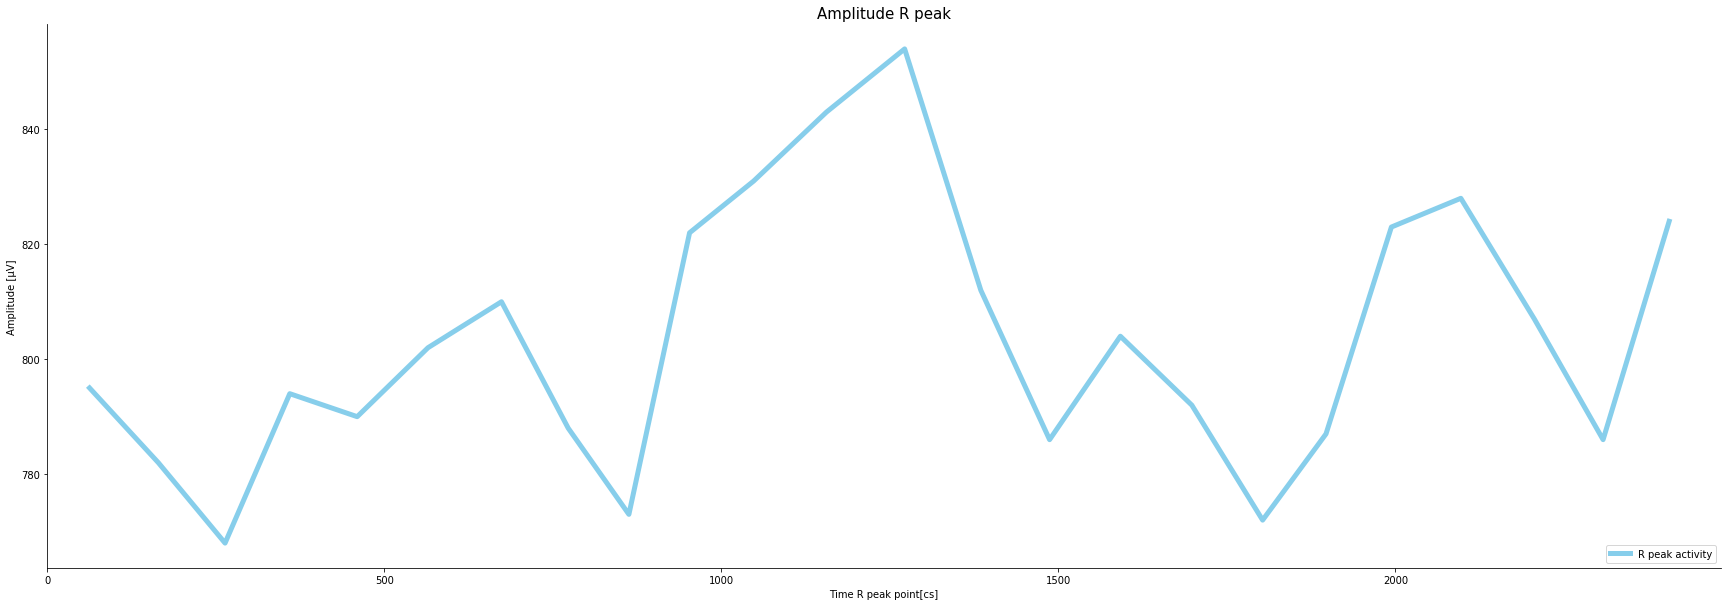

In [24]:

rr_intervals = ecg.get_rr_peaks()
r_data_points = []
r_data_amplitude = []
for i in rr_intervals:
    r_data_points.append(i)
    r_data_amplitude.append(data[i])

    
ecg.general_plot(r_data_points,r_data_amplitude,'Amplitude R peak','Time R peak point[cs]','Amplitude [µV]','R peak activity')
    
class ECG_Frequency_Domain_Analyse:
    def __init__(self):
        pass
        
    def generate_evenly_spaced_points(self,points):
        """
        Summary 
        ----------
            Generates evenly spaced time values

        Parameters
        ----------
            point : list
                List of discrete time points
        Returns
        ---------
            ndarray
                List of evenly spaced time points
        """
        return np.linspace(points[0],points[-1],points[-1]) 
    
    def interpolate_points_cubic(self,x,y):
        """
        Summary 
        ----------
            Interpolates x and y values, using cubic interpolation

        Parameters
        ----------
            x : list
                List of evenly spaced points
            y : list
                List of values
        Returns
        ---------
            f 
                interpolatin function
        """
        return interp1d(x, y, kind='cubic') 
    
    def plot_interpolation(self,x,y,x_evenly_spaced,y_interpolated):
        """
        Summary 
        ----------
            Plot data and interpolated data

        Parameters
        ----------
            x : list
                List of points
            y : list
                List of values[amplitude]
            x_evenly_spaced : list
                List of evenly spaced points
            y_interpolated : list
                List of interpolated values using f
        Returns
        ---------
            N/A
        """
        plt.figure(figsize=(30,10))
        plt.gca().spines["left"].set_position("zero")
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.title("Differences between RR",fontsize='20')
        plt.ylabel("Differences",fontsize='15')
        plt.xlabel("Timepoints [cs]",fontsize='15')
        plt.xlim(0,2483)
        plt.plot(x, y, label="Original signal", c='skyblue',linewidth=5,linestyle='--')
        plt.plot(x_evenly_spaced, y_interpolated, label="Interpolated r signal", color='red',linestyle='-',linewidth=3)
        plt.legend(fontsize='15')
        plt.show()
        
    def get_periodogram(self,amplitude,frequency):
        """
        Summary 
        ----------
            Estimate the power spectral density

        Parameters
        ----------
            x : list
                List of evenly spaced points
            y : list
                List of values/amplitudes
        Returns
        ---------
            list :
                frequencies - frequencies
                power - the power of the signal
        """
        frequencies, power = signal.periodogram(amplitude, frequency)
        return [frequencies,np.divide(power,1000)]
    
    def plot_periodogram(self,frequencies,power):
        """
        Summary 
        ----------
            Plot PSD

        Parameters
        ----------
            frequencies : list
                List of frequencies, which define the signal
            power : list
                Power of the signal
        Returns
        ---------
            N/A
        """
        plt.figure(figsize=(30,10))
        plt.fill_between(frequencies,power, where=frequencies<=0.15,facecolor='lightgreen', interpolate=True,label='LF AUC')
        plt.fill_between(frequencies,power, where=frequencies>=0.16,facecolor='darkorange', interpolate=True,label='HF AUC')
        plt.title("Power spectrum density of heart rate",fontsize='20')
        plt.plot(frequencies,power,label="PSD",linewidth=6,color='skyblue',linestyle='--') # Power is in µV, but it is recommended to be in V
        plt.xlim(0.04,0.5)  # Limit frequencies only to show LF and HF zones
        plt.ylim(0,40) # Limit the power axis
        plt.xlabel('Frequency [Hz]',fontsize='15')
        plt.ylabel('PSD [µV**2/Hz]',fontsize='15')
        plt.legend(fontsize='15')
        plt.show()
        
        

x = r_data_points[1:]
y = hrv_list['rr_list']
ecg_frequency_domain= ECG_Frequency_Domain_Analyse()
evenly_spaced_points = ecg_frequency_domain.generate_evenly_spaced_points(x)
f = ecg_frequency_domain.interpolate_points_cubic(x,y)
y_interpolated = f(evenly_spaced_points)


### Unit testing frequency domain
The test will check if the function are returning the values, that we are expecting

In [25]:
test = [0,1,2,3,4,5,6,7,8,9,10]
test_evenly_spaced_points = np.linspace(test[0],test[-1],test[-1])
# Test if the evenly spaced array from function generate_evenly_spaced_points() is equal to the test array
np.testing.assert_array_equal(ecg_frequency_domain.generate_evenly_spaced_points(test), test_evenly_spaced_points)
# Test cubic interpolation
test = [0,1,2,3,4,5,6,7,8,9,10]
test_amplitudes = [10,20,60,40,30,15,20,30,60,70,0]
f_test = interp1d(test, test_amplitudes, kind='cubic')
f = ecg_frequency_domain.interpolate_points_cubic(test,test_amplitudes)
np.testing.assert_array_equal(f(9),f_test(9))

### Analysis of R peaks in frequency domain

Frequency-domain measurements estimate the distribution of absolute or relative power into four frequency bands

ULF power	ms2	Absolute power of the ultra-low-frequency band (≤0.003 Hz)
VLF power	ms2	Absolute power of the very-low-frequency band (0.0033–0.04 Hz)
LF power	ms2	Absolute power of the low-frequency band (0.04–0.15 Hz) and is associated with the sympathetic nervous system
HF power	ms2	Absolute power of the high-frequency band (0.15–0.4 Hz) and is assotiated with the parasympathetic nervous system

The authonomic nervous system consists of two subsystems:
    - sympathetic nervous system (SNS) - The sympathetic nervous system is responsible for the so called "fight or flight" response. It is active all the time at basic level to maintain the homeostasis or steady state of a system
    - parasympathetic nervous system - The parasympathetic nervous system is responsible for rest and and digest activities

In the daytime LF increases, in the nighttime HF increases. LF increases during 90-degree tilt, mental stress, standing, occlusion of coronary arteries, moderate exercise, and occlusion of carotid arteries. HF increases in cases of respiration, cold application on the face and rotational stimulation

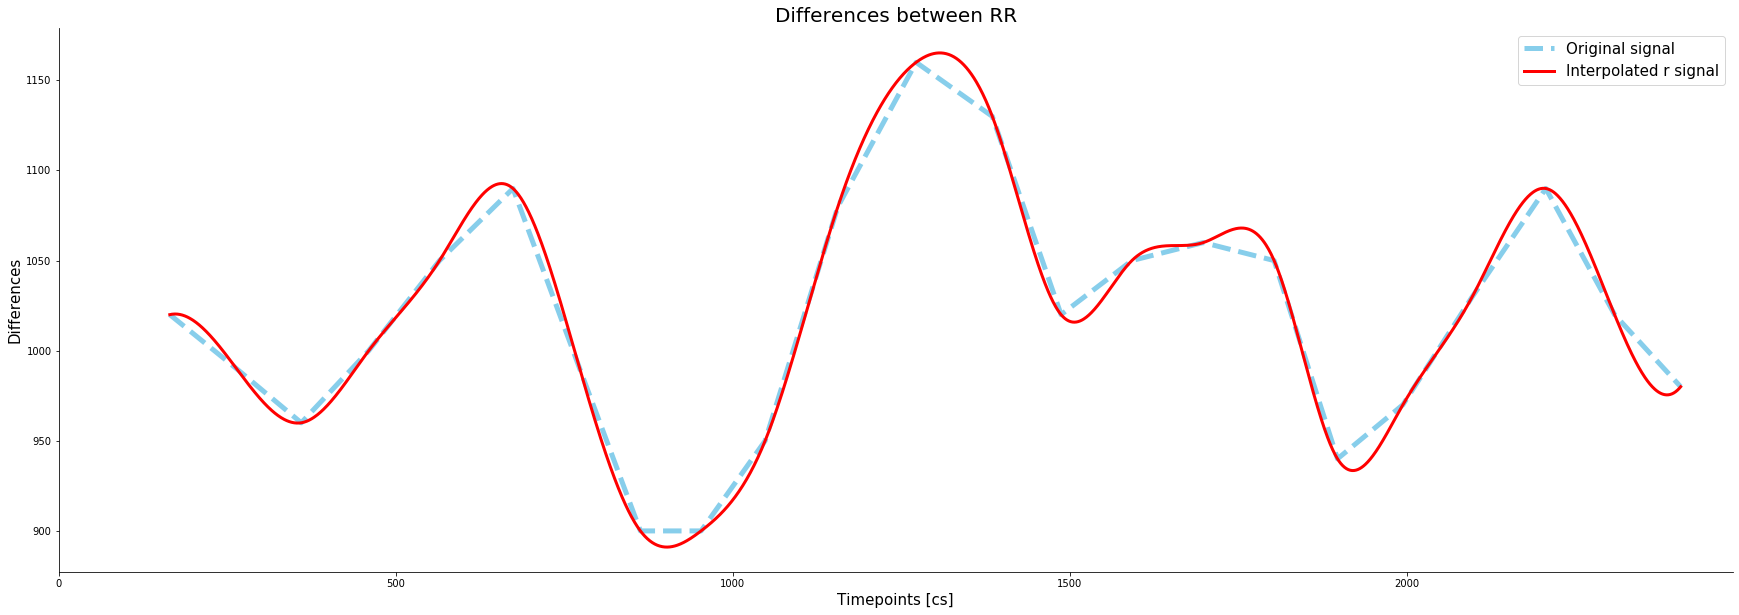

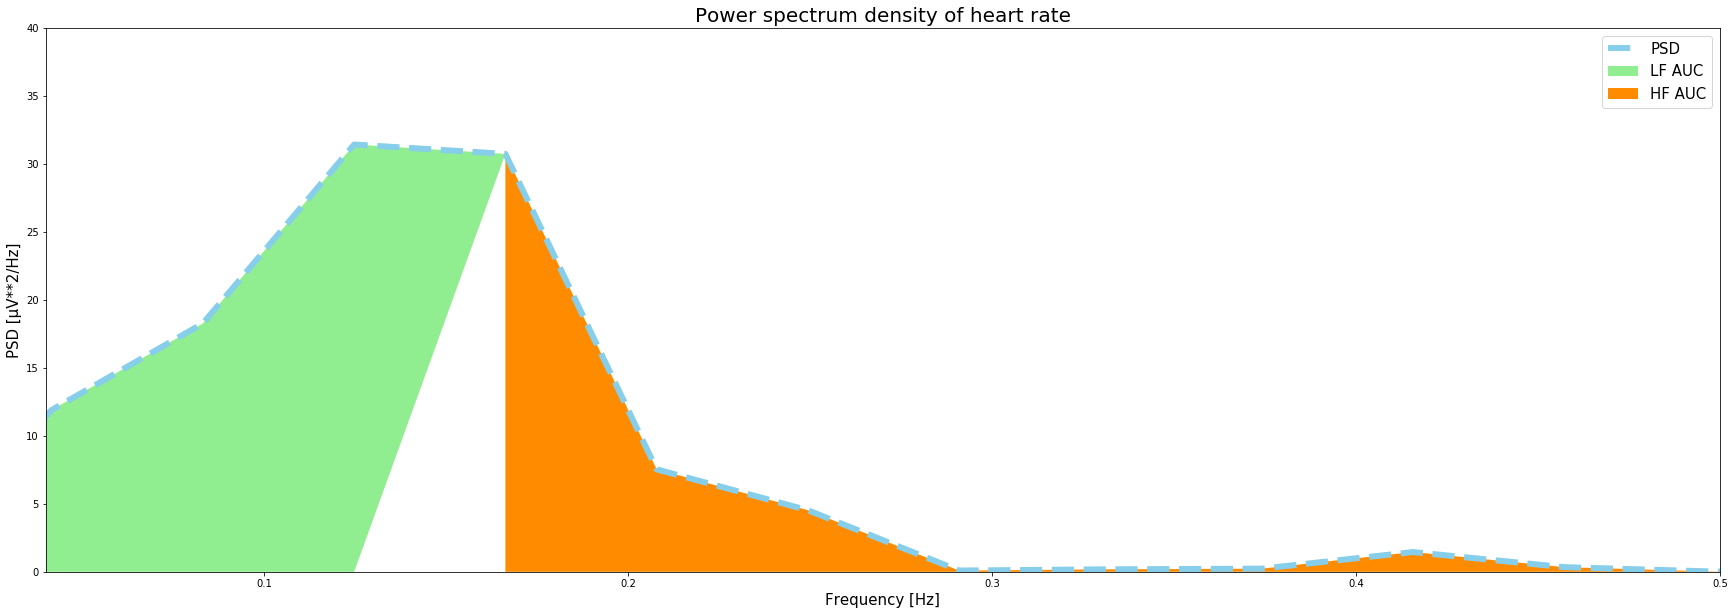

In [26]:
ecg_frequency_domain.plot_interpolation(x,y,evenly_spaced_points,y_interpolated)
periodogram = ecg_frequency_domain.get_periodogram(y_interpolated,100)
ecg_frequency_domain.plot_periodogram(periodogram[0],periodogram[1])


LF:  39.95043491343673
HF:  29.75655197777855
LF/HF ratio:  1.34


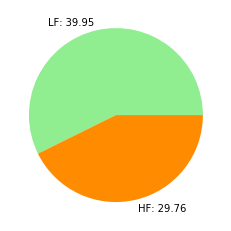

In [27]:
lf = np.trapz(abs(periodogram[1][(periodogram[0]>=0.04) & (periodogram[0]<=0.15)])) #Slice frequency spectrum where x is between 0.04 and 0.15Hz (LF), and use NumPy's trapezoidal integration function to find the area
print("LF: ", lf)
hf = np.trapz(abs(periodogram[1][(periodogram[0]>=0.16) & (periodogram[0]<=0.5)])) #Slice frequency spectrum where x is between 0.04 and 0.15Hz (LF), and use NumPy's trapezoidal integration function to find the area
print("HF: ", hf)
ratio = lf/hf
print("LF/HF ratio: ", np.round(ratio,2))
plt.pie([lf,hf], labels=['LF: {}'.format(np.round(lf,2)),'HF: {}'.format(np.round(hf,2))], colors=['lightgreen','darkorange'])
plt.show() 

## Conclusion
After we find the R peaks, we could use them to decompose the signal in its frequencies. The area under the PSD, which is greater than or equal 0.04 Hz and smaller than or equal 0.15 Hz is equal to the low frequency and is directly assotiated with the sympathetic nervous system. This system is also associated with 'fight or flight' responses of the body. 
HF is associated with frequencies greater than or equal 0.16 Hz and smaller than or equal 0.4 Hz
A ratio of LF/HF above 4.0 is assotiated with high mental stress as the sympathetic nervous system is highly activated 

## References
1. https://en.wikipedia.org/wiki/Heart_rate_variability
2. van Gent, P. (2016). Analyzing a Discrete Heart Rate Signal Using Python. A tech blog about fun things with Python and embedded electronics. Retrieved from: http://www.paulvangent.com/2016/03/21/analyzing-a-discrete-heart-rate-signal-using-python-part-2/
3. van Gent, P. (2016). Analyzing a Discrete Heart Rate Signal Using Python. A tech blog about fun things with Python and embedded electronics. Retrieved from: http://www.paulvangent.com/2016/03/30/analyzing-a-discrete-heart-rate-signal-using-python-part-3
4. van Gent, P. (2016). Analyzing a Discrete Heart Rate Signal Using Python. A tech blog about fun things with Python and embedded electronics. Retrieved from: http://www.paulvangent.com/2016/03/15/analyzing-a-discrete-heart-rate-signal-using-python-part-1/
5. Fred Shaffer, and J. P. Ginsberg, An Overview of Heart Rate Variability Metrics and Norms https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5624990/
6. Mucahid Yilmaz, Hidayet Kayancicek, Yusuf Cekici, Heart rate variability: Highlights from hidden signals https://www.oatext.com/heart-rate-variability-highlights-from-hidden-signals.php
7. https://help.elitehrv.com/article/159-hrv-frequency
8. Wilhelm von Rosenberg, Theerasak Chanwimalueang, Tricia Adjei, Usman Jaffer, Valentin Goverdovsky, and Danilo P. Mandic, Resolving Ambiguities in the LF/HF Ratio: LF-HF Scatter Plots for the Categorization of Mental and Physical Stress from HRV, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5469891/
9.  Hye-Geum Kim, Eun-Jin Cheon, Dai-Seg Bai, Young Hwan Lee, Bon-Hoon Koo, Stress and Heart Rate Variability: A Meta-Analysis and Review of the Literature, https://www.psychiatryinvestigation.org/journal/view.php?doi=10.30773/pi.2017.08.17
10. http://www.bioscan.com/dt_hrv1.htm
11. Hui-Min Wang and Sheng-Chieh Huang, SDNN/RMSSD as a Surrogate for LF/HF: A Revised Investigation, https://www.hindawi.com/journals/mse/2012/931943/
12. http://www.esctaic.org/documents/2011de/Schaffer.pdf

